In [108]:
import pandas as pd
import numpy as np
import yfinance as yf

df = pd.read_csv("./data/sample_trades.csv")
print(df.head())


         date ticker action  quantity   price
0  2023-01-10   AAPL    buy        10  145.30
1  2023-02-15   TSLA    buy         5  196.75
2  2023-03-01   AAPL   sell         5  155.00
3  2023-04-22   MSFT    buy         8  280.20
4  2023-05-12   AAPL    buy         2  160.50


In [109]:


df["quantity"] = df.apply(
    lambda row: -row["quantity"] if row["action"] == "sell" else row["quantity"], axis=1
)

In [110]:
df =df.drop(columns=["action"])

In [111]:
df['signed_value'] = df["quantity"] * df["price"]
df.head()

,date,ticker,quantity,price,signed_value
0,2023-01-10,AAPL,10,145.30,1453.00
1,2023-02-15,TSLA,5,196.75,983.75
2,2023-03-01,AAPL,-5,155.00,-775.00
3,2023-04-22,MSFT,8,280.20,2241.60
4,2023-05-12,AAPL,2,160.50,321.00


In [112]:
tickers = df["ticker"].unique().tolist()
holdings = pd.DataFrame({
    "Tickier" : df["ticker"],
    "Quantity" : df["quantity"],
    "Cost" : df["signed_value"]
}).groupby("Tickier").sum().reset_index()

holdings.head()



,Tickier,Quantity,Cost
0,AAPL,7,999.00
1,MSFT,8,2241.60
2,TSLA,5,983.75


In [113]:
df["date"] = pd.to_datetime(df["date"])
data = yf.download(tickers,start=df["date"].min(),end=pd.Timestamp.today().normalize())


[*********************100%***********************]  3 of 3 completed


In [114]:
data.tail()

Price            Close                                High              \
Ticker            AAPL        MSFT        TSLA        AAPL        MSFT   
Date                                                                     
2025-04-08  172.419998  354.559998  221.860001  190.339996  373.649994   
2025-04-09  198.850006  390.489990  272.200012  200.610001  393.230011   
2025-04-10  190.419998  381.350006  252.399994  194.779999  383.899994   
2025-04-11  198.149994  388.450012  252.309998  199.539993  390.049988   
2025-04-14  202.520004  387.809998  252.350006  212.940002  394.640015   

Price                          Low                                Open  \
Ticker            TSLA        AAPL        MSFT        TSLA        AAPL   
Date                                                                     
2025-04-08  250.440002  169.210007  350.250000  217.800003  186.699997   
2025-04-09  274.690002  171.889999  353.100006  223.880005  171.949997   
2025-04-10  262.489990  183.000000  367.799988  239.330002  189.070007   
2025-04-11  257.739990  186.059998  378.890015  241.360001  186.100006   
2025-04-14  261.799988  201.162094  384.209991  245.929993  211.440002   

Price                                  Volume                       
Ticker            MSFT        TSLA       AAPL      MSFT       TSLA  
Date                                                                
2025-04-08  368.260010  245.000000  120859500  35868900  171603500  
2025-04-09  353.540009  224.690002  184395900  50199700  219433400  
2025-04-10  382.059998  260.000000  121880000  38024400  181722600  
2025-04-11  380.640015  251.839996   87300000  23828700  128656900  
2025-04-14  393.220001  258.325012  100650083  18941747   99522520

In [115]:
latest_prices = data["Close"].iloc[-1]
holdings["Current Price"] = holdings["Tickier"].map(latest_prices)

holdings.head()


,Tickier,Quantity,Cost,Current Price
0,AAPL,7,999.00,202.520004
1,MSFT,8,2241.60,387.809998
2,TSLA,5,983.75,252.350006


In [116]:
holdings["Current Value"] = holdings["Current Price"]*holdings["Quantity"]

In [117]:
holdings.head()

,Tickier,Quantity,Cost,Current Price,Current Value
0,AAPL,7,999.00,202.520004,1417.640030
1,MSFT,8,2241.60,387.809998,3102.479980
2,TSLA,5,983.75,252.350006,1261.750031


In [118]:
df.head()

,date,ticker,quantity,price,signed_value
0,2023-01-10,AAPL,10,145.30,1453.00
1,2023-02-15,TSLA,5,196.75,983.75
2,2023-03-01,AAPL,-5,155.00,-775.00
3,2023-04-22,MSFT,8,280.20,2241.60
4,2023-05-12,AAPL,2,160.50,321.00


In [119]:
holdings["Profit/Loss"] = holdings["Current Value"] - holdings["Cost"]


In [120]:
holdings.head()

,Tickier,Quantity,Cost,Current Price,Current Value,Profit/Loss
0,AAPL,7,999.00,202.520004,1417.640030,418.640030
1,MSFT,8,2241.60,387.809998,3102.479980,860.879980
2,TSLA,5,983.75,252.350006,1261.750031,278.000031


In [121]:
df["date"] = pd.to_datetime(df["date"])

In [122]:
history = df.pivot_table(index="date",columns="ticker",values="quantity",aggfunc="sum")

In [123]:
all_days = pd.date_range(start=history.index.min(),end=pd.Timestamp.today().normalize())

history = history.reindex(all_days).fillna(0).cumsum()

In [124]:
history

ticker,AAPL,MSFT,TSLA
2023-01-10,10.0,0.0,0.0
2023-01-11,10.0,0.0,0.0
2023-01-12,10.0,0.0,0.0
2023-01-13,10.0,0.0,0.0
2023-01-14,10.0,0.0,0.0
...,...,...,...
2025-04-11,7.0,8.0,5.0
2025-04-12,7.0,8.0,5.0
2025-04-13,7.0,8.0,5.0
2025-04-14,7.0,8.0,5.0


In [125]:
daily_value = data["Close"]*history

In [126]:
history

ticker,AAPL,MSFT,TSLA
2023-01-10,10.0,0.0,0.0
2023-01-11,10.0,0.0,0.0
2023-01-12,10.0,0.0,0.0
2023-01-13,10.0,0.0,0.0
2023-01-14,10.0,0.0,0.0
...,...,...,...
2025-04-11,7.0,8.0,5.0
2025-04-12,7.0,8.0,5.0
2025-04-13,7.0,8.0,5.0
2025-04-14,7.0,8.0,5.0


In [134]:
data["Close"]

Ticker,AAPL,MSFT,TSLA
Date,,,
2023-01-10,129.227463,224.704407,118.849998
2023-01-11,131.955780,231.499039,123.220001
2023-01-12,131.876678,234.189423,123.559998
2023-01-13,133.211151,234.896362,122.400002
2023-01-17,134.377594,235.996109,131.490005
...,...,...,...
2025-04-08,172.419998,354.559998,221.860001
2025-04-09,198.850006,390.489990,272.200012
2025-04-10,190.419998,381.350006,252.399994


In [131]:
daily_value = history * data["Close"]
daily_value

ticker,AAPL,MSFT,TSLA
2023-01-10,1292.274628,0.000000,0.000000
2023-01-11,1319.557800,0.000000,0.000000
2023-01-12,1318.766785,0.000000,0.000000
2023-01-13,1332.111511,0.000000,0.000000
2023-01-14,NaN,NaN,NaN
...,...,...,...
2025-04-11,1387.049957,3107.600098,1261.549988
2025-04-12,NaN,NaN,NaN
2025-04-13,NaN,NaN,NaN
2025-04-14,1417.640030,3102.479980,1261.750031


In [135]:
daily_value = daily_value.fillna(method="bfill")

/var/folders/01/63vbx23n4j1f9ykpncsfr4mm0000gn/T/ipykernel_4646/4182746832.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_value = daily_value.fillna(method="bfill")


In [138]:
daily_value["Total"] = daily_value.sum(axis=1)

In [139]:
daily_value

ticker,AAPL,MSFT,TSLA,Total
2023-01-10,1292.274628,0.000000,0.000000,1292.274628
2023-01-11,1319.557800,0.000000,0.000000,1319.557800
2023-01-12,1318.766785,0.000000,0.000000,1318.766785
2023-01-13,1332.111511,0.000000,0.000000,1332.111511
2023-01-14,1343.775940,0.000000,0.000000,1343.775940
...,...,...,...,...
2025-04-11,1387.049957,3107.600098,1261.549988,5756.200043
2025-04-12,1417.640030,3102.479980,1261.750031,5781.870041
2025-04-13,1417.640030,3102.479980,1261.750031,5781.870041
2025-04-14,1417.640030,3102.479980,1261.750031,5781.870041


<Axes: >

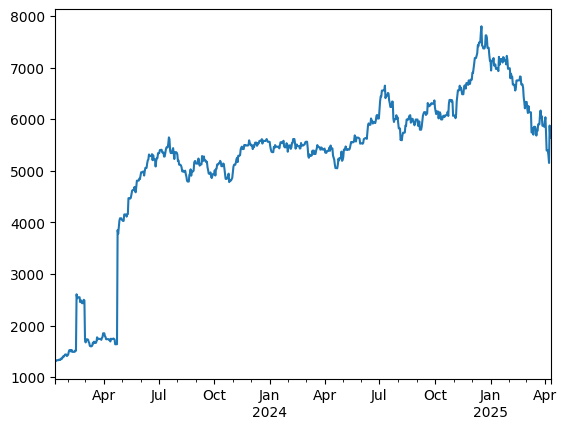

In [55]:
daily_value["Total"].plot()

In [140]:
data

Price            Close                                High              \
Ticker            AAPL        MSFT        TSLA        AAPL        MSFT   
Date                                                                     
2023-01-10  129.227463  224.704407  118.849998  129.751370  227.119836   
2023-01-11  131.955780  231.499039  123.220001  131.975539  231.675771   
2023-01-12  131.876678  234.189423  123.559998  132.716900  235.554242   
2023-01-13  133.211151  234.896362  122.400002  133.369316  235.033826   
2023-01-17  134.377594  235.996109  131.490005  135.712069  236.545962   
...                ...         ...         ...         ...         ...   
2025-04-08  172.419998  354.559998  221.860001  190.339996  373.649994   
2025-04-09  198.850006  390.489990  272.200012  200.610001  393.230011   
2025-04-10  190.419998  381.350006  252.399994  194.779999  383.899994   
2025-04-11  198.149994  388.450012  252.309998  199.539993  390.049988   
2025-04-14  202.520004  387.809998  252.350006  212.940002  394.640015   

Price                          Low                                Open  \
Ticker            TSLA        AAPL        MSFT        TSLA        AAPL   
Date                                                                     
2023-01-10  122.760002  126.647460  223.211937  114.919998  128.762863   
2023-01-11  125.949997  128.960606  226.923451  120.510002  129.741519   
2023-01-12  124.129997  129.929319  229.329094  117.000000  132.341278   
2023-01-13  122.629997  130.146790  230.664440  115.599998  130.512532   
2023-01-17  131.699997  132.588399  232.795154  125.019997  133.280351   
...                ...         ...         ...         ...         ...   
2025-04-08  250.440002  169.210007  350.250000  217.800003  186.699997   
2025-04-09  274.690002  171.889999  353.100006  223.880005  171.949997   
2025-04-10  262.489990  183.000000  367.799988  239.330002  189.070007   
2025-04-11  257.739990  186.059998  378.890015  241.360001  186.100006   
2025-04-14  261.799988  201.162094  384.209991  245.929993  211.440002   

Price                                  Volume                       
Ticker            MSFT        TSLA       AAPL      MSFT       TSLA  
Date                                                                
2023-01-10  223.634141  121.070000   63896200  27033900  167642500  
2023-01-11  227.100183  122.089996   69458900  28669300  183810800  
2023-01-12  230.998296  122.559998   71379600  27269500  169400900  
2023-01-13  232.706763  116.550003   57809700  21333300  180714100  
2023-01-17  233.659217  125.699997   63646600  29831300  186477000  
...                ...         ...        ...       ...        ...  
2025-04-08  368.260010  245.000000  120859500  35868900  171603500  
2025-04-09  353.540009  224.690002  184395900  50199700  219433400  
2025-04-10  382.059998  260.000000  121880000  38024400  181722600  
2025-04-11  380.640015  251.839996   87300000  23828700  128656900  
2025-04-14  393.220001  258.325012  100650083  18941747   99522520  

[567 rows x 15 columns]